# **This project aims to use Natural Language Processing (NLP) to analyse product reviews given by online shoppers. Machine learning models can be used for business to improve their products and to increase sales!**

## Scope of this notebook:
### 1) EDA, data pre-processing
### 2) visualization to get some meaningful insights 
### 3) unsupervised classification on review texts
### 4) supervised learning to predict ratings
### 5) product recommendation using similarity matrix


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
%config InlineBackend.figure_formats = ['retina']
import seaborn as sns
import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
import os
# os.listdir("../input")
from sklearn.metrics import confusion_matrix, classification_report

Populating the interactive namespace from numpy and matplotlib


In [2]:
df=pd.read_csv('GrammarandProductReviews.csv')
df.head()

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   
4  AV16khLE-jtxr-f38VFn              K-Y   

                                          categories             dateAdded  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...  2017-07-25T00:52:42Z   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...  2017-07-25T05:16:03Z   
2  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...  2017-07-25T05:16:03Z   
3  Personal Care,Medicine Cabinet,Lubricant/Sperm...  2017-07-25T16:26:19Z   
4  Personal Care,Medicine Cabinet,Lubricant/Sperm...  2017-07-25T16:26:19Z   

            dateUpdated          ean  \
0  2018-02-05T08:36:58Z  6.02537E+11   
1  2018-02-05T11:27:45Z  73416000391   
2  2018-02-05T11:27:45Z  73416000391   
3  2018-02-05T11:25:51Z  67981934427   
4  2018-02-05T11:25:51Z  67981934427   

                                                keys  \
0  602537205981,universalmusic/14331328,universal...   
1  lundbergorganiccinnamontoastricecakes/b000fvzw...   
2  lundbergorganiccinnamontoastricecakes/b000fvzw...   
3  kylovesensualitypleasuregel/b00u2whx8s,0679819...   
4  kylovesensualitypleasuregel/b00u2whx8s,0679819...   

                         manufacturer manufacturerNumber  \
0  Universal Music Group / Cash Money           14331328   
1                            Lundberg             574764   
2                            Lundberg             574764   
3                                 K-Y        67981934427   
4                                 K-Y        67981934427   

                                         name     ...        reviews.id  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)     ...               NaN   
1  Lundberg Organic Cinnamon Toast Rice Cakes     ...       100209113.0   
2  Lundberg Organic Cinnamon Toast Rice Cakes     ...       100209113.0   
3            K-Y Love Sensuality Pleasure Gel     ...       113026909.0   
4            K-Y Love Sensuality Pleasure Gel     ...       171267657.0   

  reviews.numHelpful reviews.rating  \
0                0.0              5   
1                NaN              5   
2                NaN              5   
3                NaN              1   
4                NaN              1   

                                  reviews.sourceURLs  \
0  https://redsky.target.com/groot-domain-api/v1/...   
1   https://www.walmart.com/reviews/product/29775278   
2   https://www.walmart.com/reviews/product/29775278   
3   https://www.walmart.com/reviews/product/43383370   
4   https://www.walmart.com/reviews/product/43383370   

                                        reviews.text  reviews.title  \
0  i love this album. it's very good. more to the...   Just Awesome   
1  Good flavor. This review was collected as part...           Good   
2                                       Good flavor.           Good   
3  I read through the reviews on here before look...   Disappointed   
4  My husband bought this gel for us. The gel cau...     Irritation   

   reviews.userCity  reviews.userProvince reviews.username          upc  
0       Los Angeles                   NaN           Joshua  6.02537E+11  
1               NaN                   NaN        Dorothy W  73416000391  
2               NaN                   NaN        Dorothy W  73416000391  
3               NaN                   NaN          Rebecca  67981934427  
4               NaN                   NaN        Walker557  67981934427  

[5 rows x 25 columns]

# EDA, Data Pre-Processing

In [3]:
# data overview
print ('Rows     : ', df.shape[0])
print ('Columns  : ', df.shape[1])
print ('\nFeatures : ', df.columns.tolist())
print ('\nMissing values :  ', df.isnull().sum().values.sum())
print ('\nUnique values :  \n', df.nunique())

Rows     :  71044
Columns  :  25

Features :  ['id', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys', 'manufacturer', 'manufacturerNumber', 'name', 'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title', 'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'upc']

Missing values :   296152

Unique values :  
 id                        600
brand                     392
categories                581
dateAdded                 598
dateUpdated               354
ean                       473
keys                      600
manufacturer              463
manufacturerNumber        583
name                      600
reviews.date            13789
reviews.dateAdded        3199
reviews.dateSeen        17469
reviews.didPurchase         2
reviews.doRecommend         2
reviews.id              31374
reviews.numHelpful       

In [319]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71008 entries, 0 to 71043
Data columns (total 27 columns):
id                      71008 non-null object
brand                   71008 non-null object
categories              71008 non-null object
dateAdded               71008 non-null object
dateUpdated             71008 non-null object
ean                     39031 non-null object
keys                    71008 non-null object
manufacturer            70867 non-null object
manufacturerNumber      70806 non-null object
name                    71008 non-null object
reviews.date            70941 non-null object
reviews.dateAdded       71008 non-null object
reviews.dateSeen        71008 non-null object
reviews.didPurchase     71008 non-null object
reviews.doRecommend     60427 non-null object
reviews.id              32156 non-null float64
reviews.numHelpful      32506 non-null float64
reviews.rating          71008 non-null int64
reviews.sourceURLs      71008 non-null object
reviews.text    

id                          0
brand                       0
categories                  0
dateAdded                   0
dateUpdated                 0
ean                     31977
keys                        0
manufacturer              141
manufacturerNumber        202
name                        0
reviews.date               67
reviews.dateAdded           0
reviews.dateSeen            0
reviews.didPurchase         0
reviews.doRecommend     10581
reviews.id              38852
reviews.numHelpful      38502
reviews.rating              0
reviews.sourceURLs          0
reviews.text                0
reviews.title             464
reviews.userCity        65598
reviews.userProvince    70559
reviews.username           96
upc                         2
reviews_length              0
sentiment                   0
dtype: int64

In [6]:
# drop the rows having null values for reviews text
df = df.dropna(subset=['reviews.text'])

In [177]:
# there are many duplicate reviews (exact same comments in reviews.text)
# but I am not going to clean the data yet, so I just use the data as it is, to go through the learning process.
df['reviews.text'].value_counts()[10:50]

Works great                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                5
Yummy                                                                                                                                                                                                                                                                                                      

## **How are the ratings distributed?**

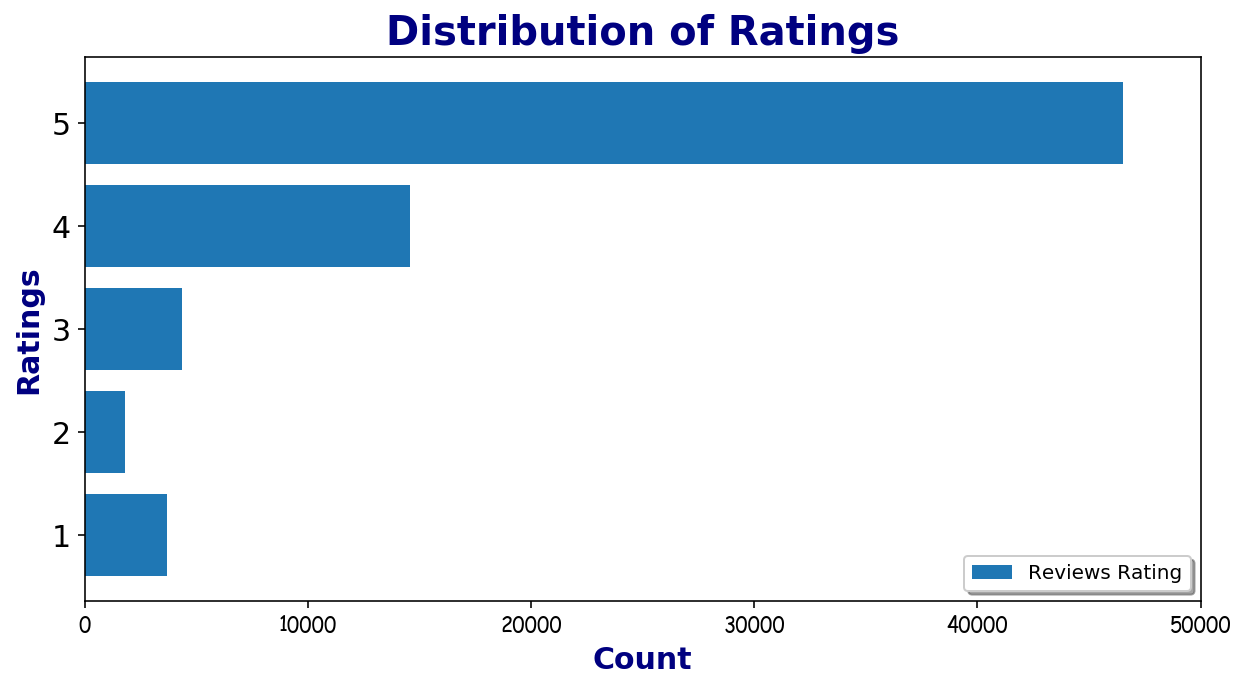

In [178]:
# Plot ratings frequency
plt.figure(figsize = [10,5])   # [width, height]

x = list( df['reviews.rating'].value_counts().index )
y = list( df['reviews.rating'].value_counts() )
plt.barh(x, y)

ticks_x = np.linspace(0, 50000, 6)   # (start, end, number of ticks)
plt.xticks(ticks_x, fontsize=10, family='fantasy', color='black')
plt.yticks( size=15 )

plt.title('Distribution of Ratings', fontsize=20, weight='bold', color='navy', loc='center')
plt.xlabel('Count', fontsize=15, weight='bold', color='navy')
plt.ylabel('Ratings', fontsize=15, weight='bold', color='navy')
plt.legend(['Reviews Rating'], shadow=True, loc=4)
# loc=1 topright, loc=2 topleft, loc=3 bottomleft, loc=4 bottom right, loc=9 topmiddle

# plt.grid()   # add grid lines

## **What words do people use in their reviews?**

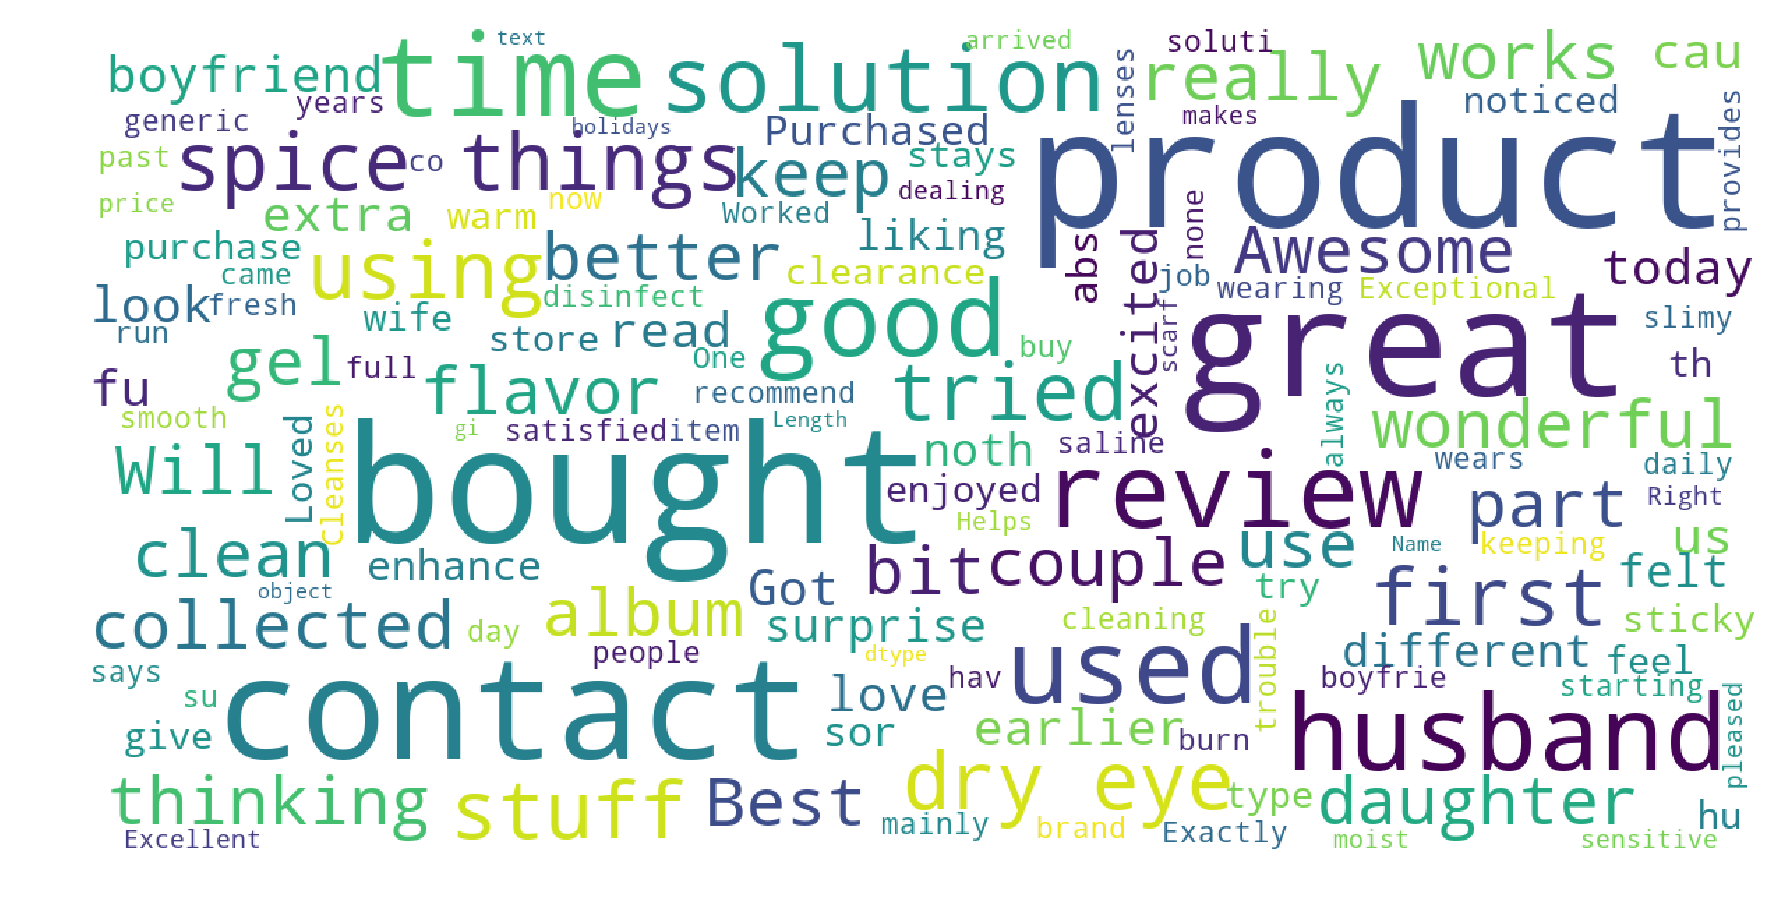

In [181]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['reviews.text'])

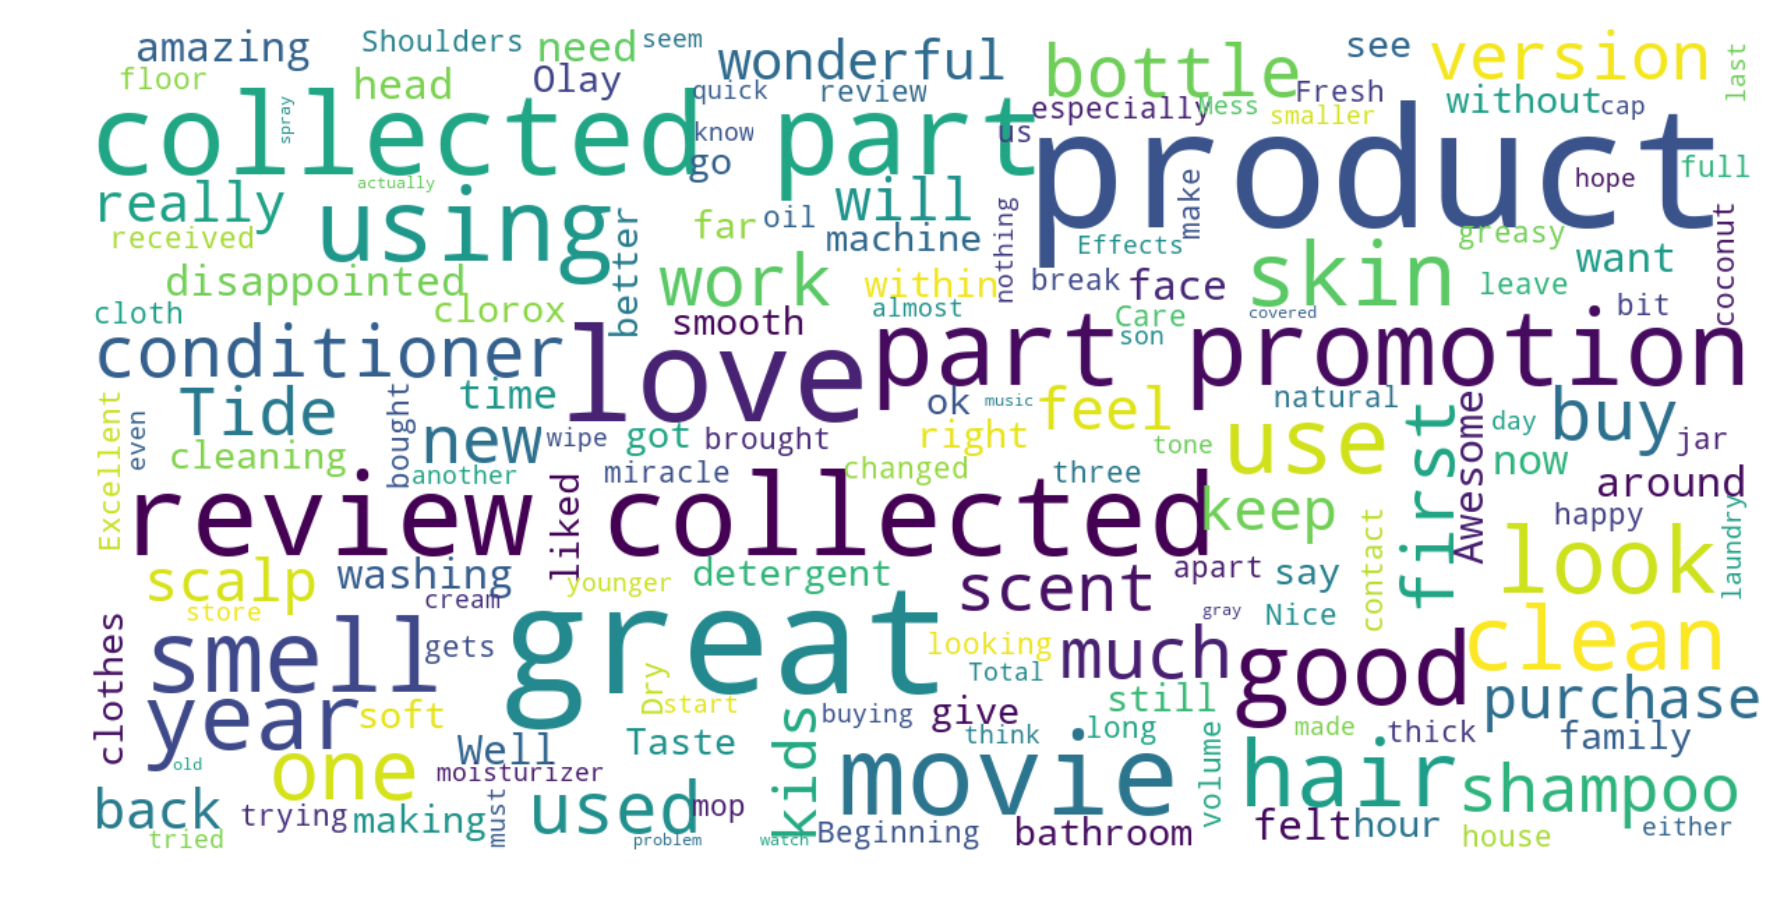

In [146]:
# alternate code, seems to yield different results
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=300, max_font_size=40, scale=3,
        random_state=1).generate(str(df['reviews.text'].value_counts()))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

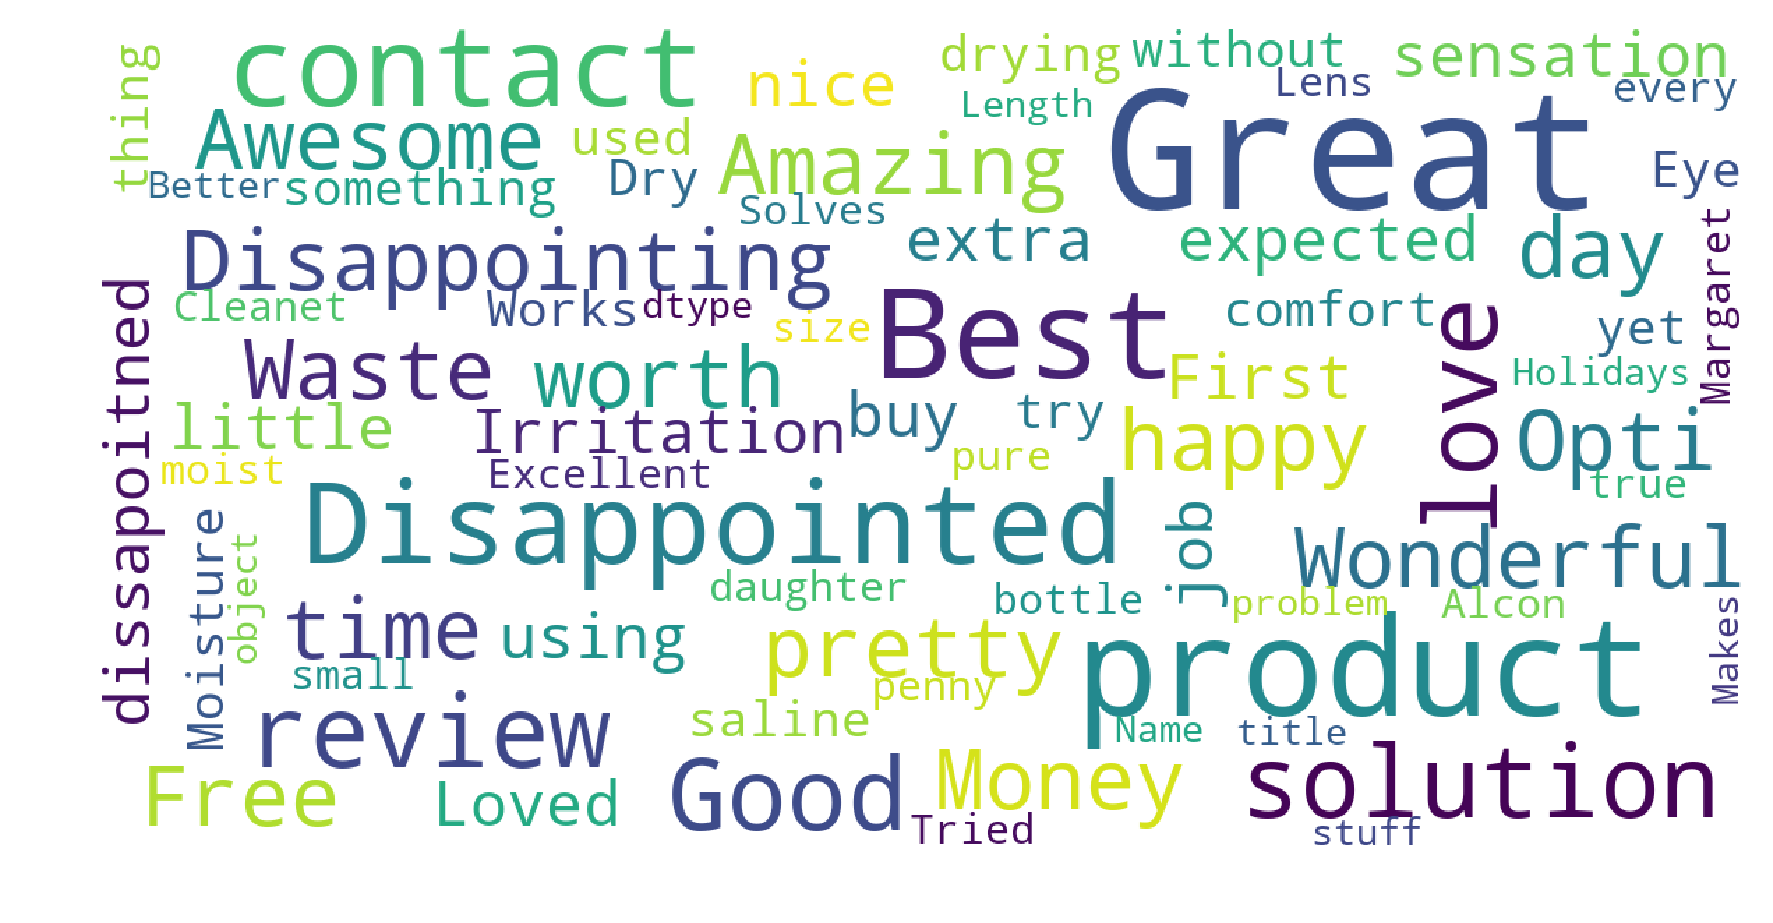

In [142]:
show_wordcloud(df['reviews.title'])
# Great = 10938, great = 3133
# Disappointed = 156, disappointed = 75, Disappointing = 50, disappointing = 25, dissapoitned = 1

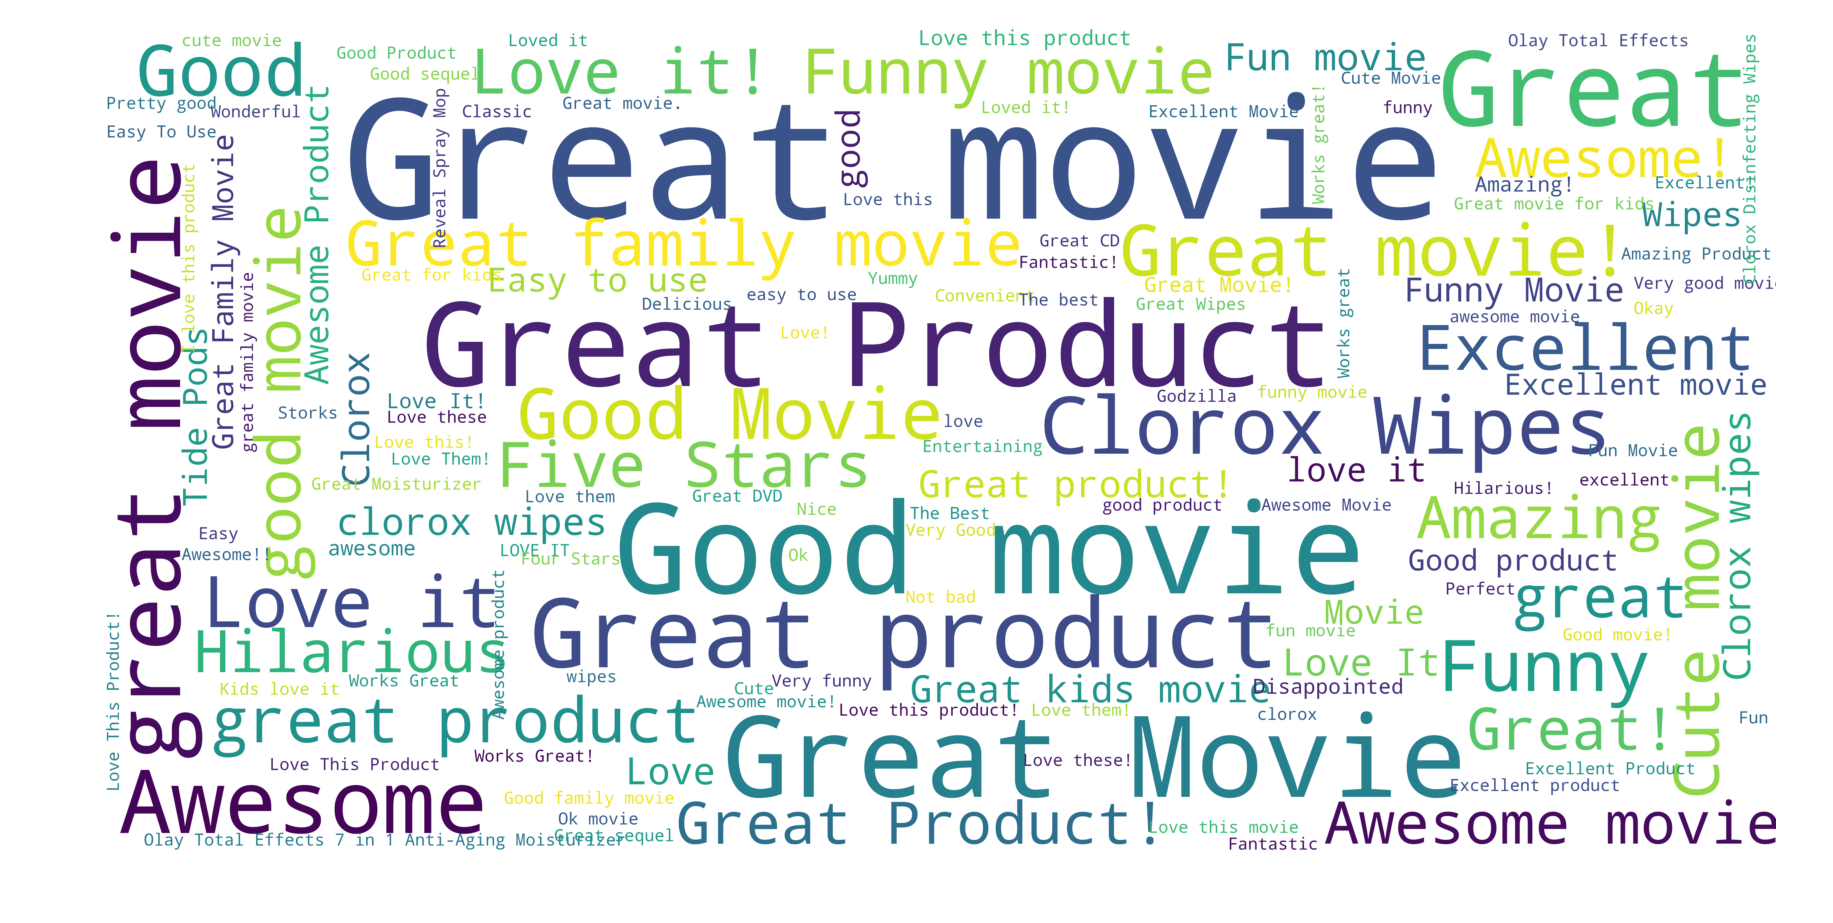

In [343]:
# alternate code, seems to yield different results
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=400, max_font_size=40, scale=30,
        random_state=1).generate_from_frequencies((df['reviews.title'].value_counts()  ))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

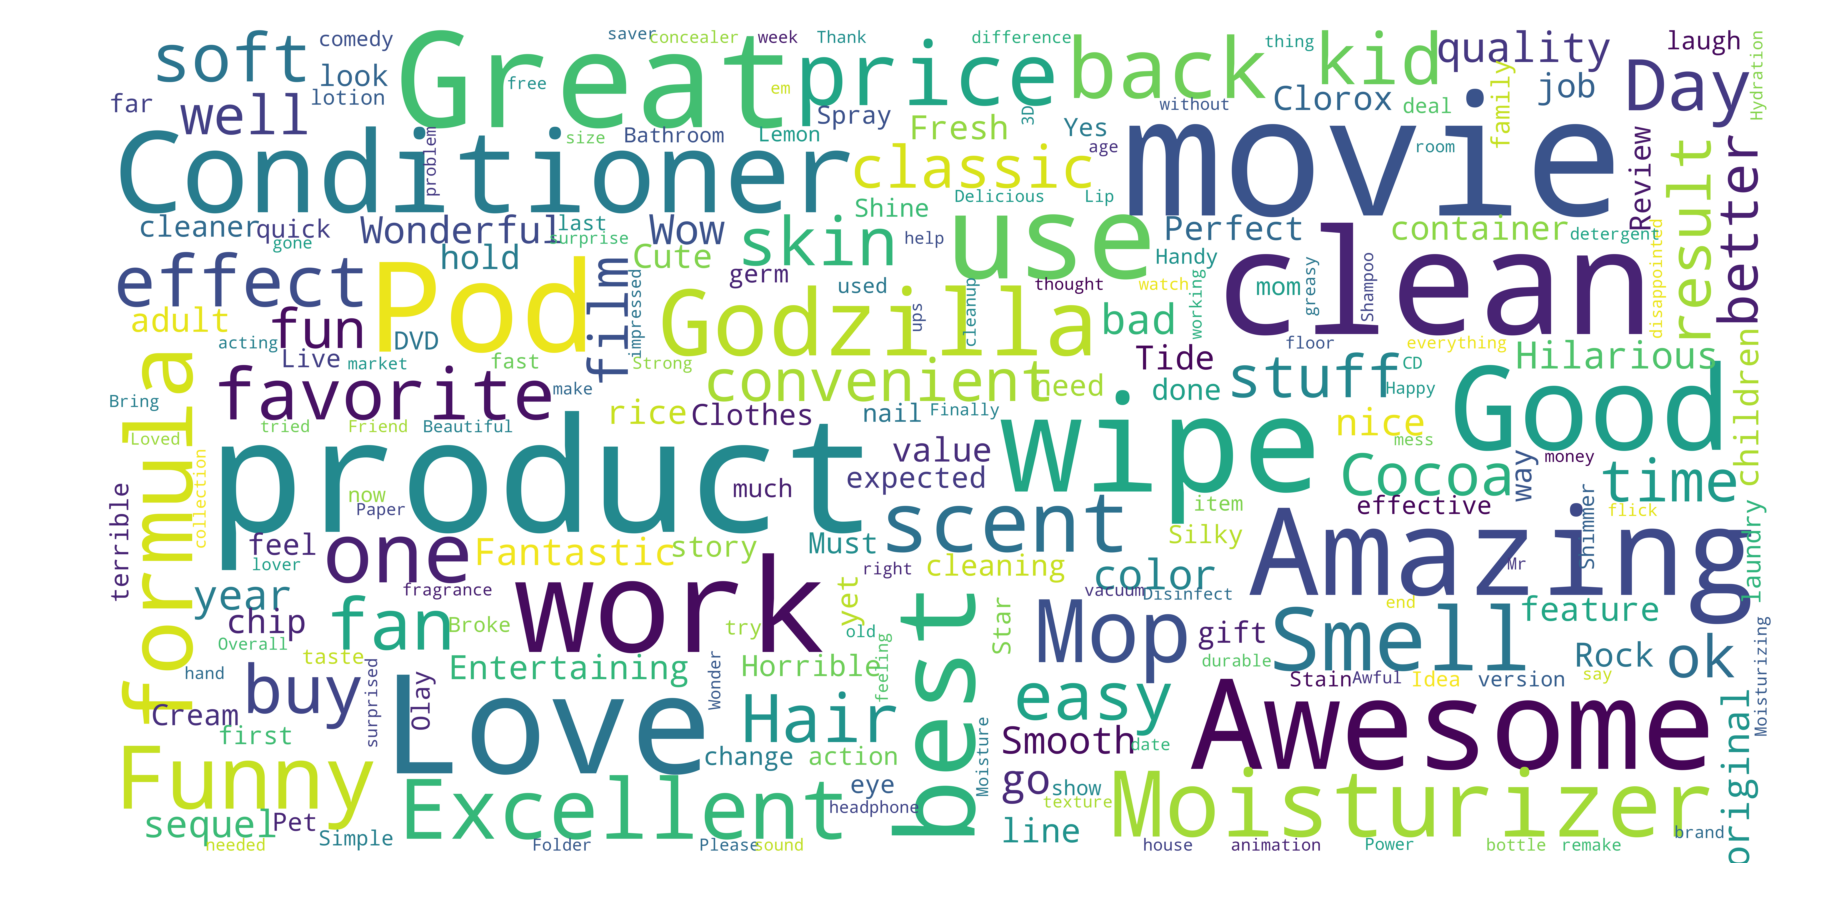

In [182]:
# try to tokenize to individual word (uni-gram) - reviews.title
split_title = []
listCounts = []
split_title = [x.split(" ") for x in df['reviews.title'].astype(str)]
big_list = []
for x in split_title:
    big_list.extend(x)

listCounts = pd.Series(big_list).value_counts()

wordcloud = WordCloud(background_color='white', max_words=400, max_font_size=40, scale=30,
        random_state=1).generate((listCounts[listCounts > 2]).to_string())
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [183]:
len(big_list)  # reviews.title

232610

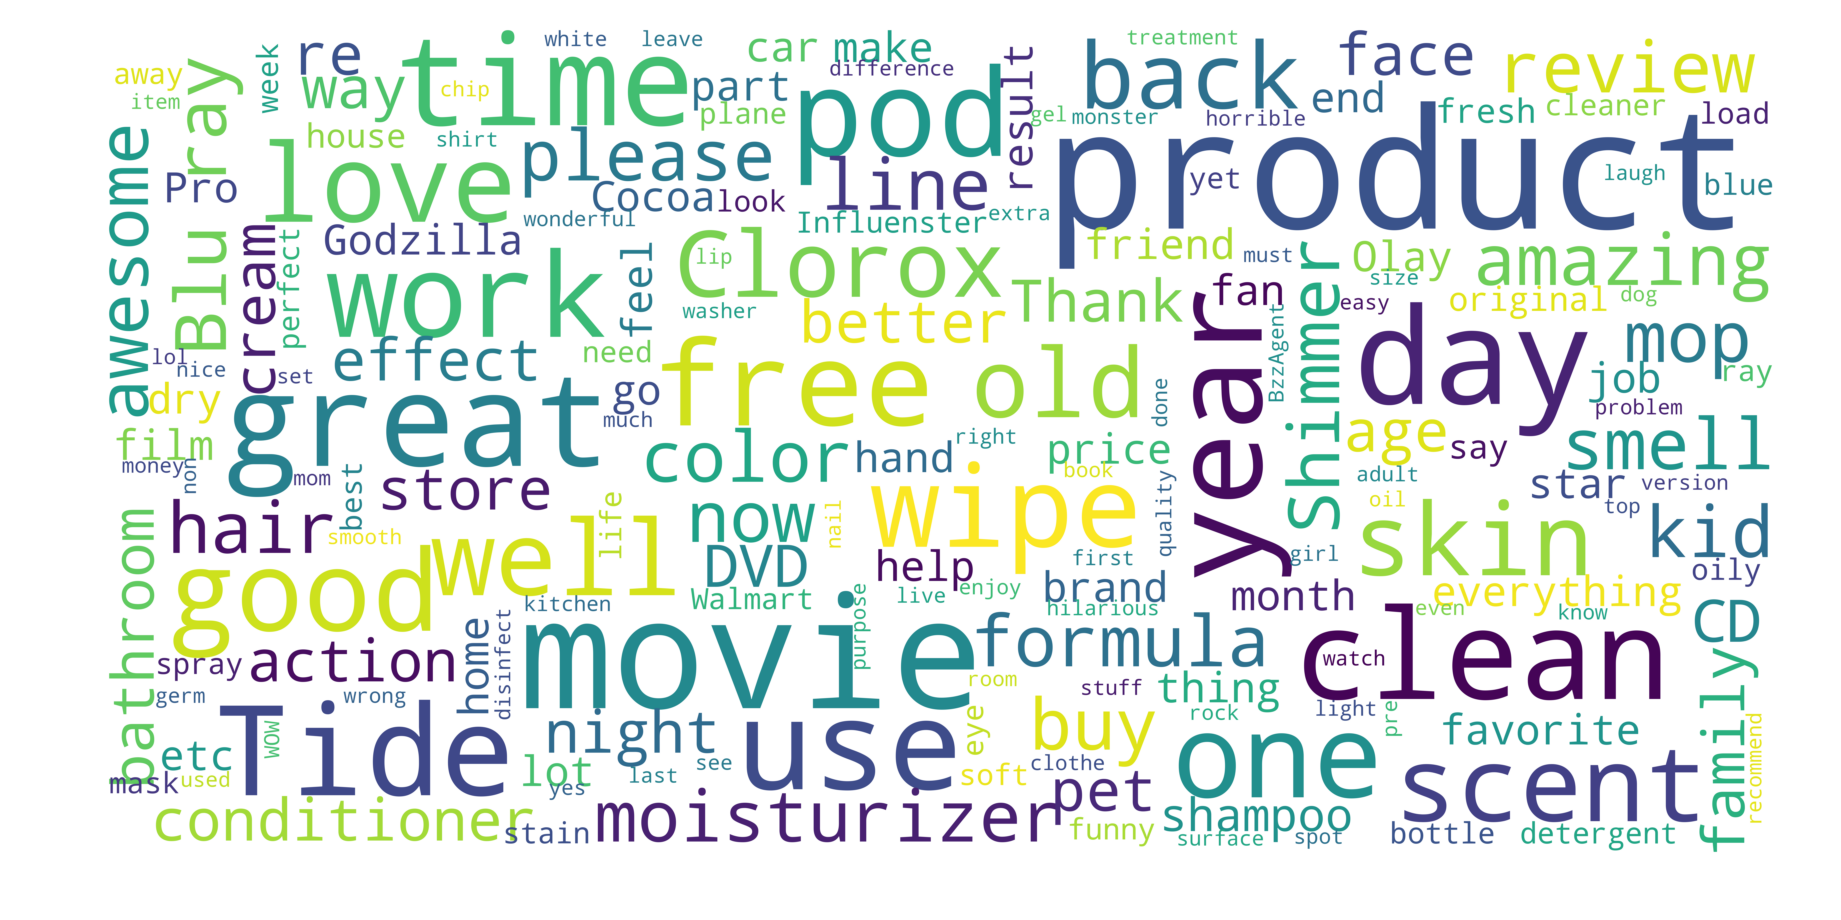

In [184]:
# try to tokenize to individual word (uni-gram) - reviews.text
split_title = []
listCounts = []
split_title = [x.split(" ") for x in df['reviews.text'].astype(str)]
big_list = []
for x in split_title:
    big_list.extend(x)

listCounts = pd.Series(big_list).value_counts()

wordcloud = WordCloud(background_color='white', max_words=400, max_font_size=40, scale=30,
        random_state=1).generate((listCounts[listCounts > 2]).to_string())
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [185]:
len(big_list)   # reviews.text

2801041

In [312]:
# Let's see what are the popular categories, looks quite messy
df['categories'].value_counts()

Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners    8606
Featured Brands,Character Shop,The Secret Life Of Pets,Movies, Music & Books,Movies,Kids' & Family,Movies & TV,4K Ultra HD Movies,Movies & Music,Movies & TV Shows,Blu-ray                                                                                                                                                                                                                                                                                                              5510
Movies, Music & Books,Movies,Action & Adventur

In [196]:
# Let's see which are the popular products reviewed 
df['name'].value_counts()

Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                                                       8606
The Secret Life Of Pets (4k/uhd + Blu-Ray + Digital)                                                            5510
Independence Day Resurgence (4k/uhd + Blu-Ray + Digital)                                                        3609
Tide Original Liquid Laundry Detergent - 100 Oz                                                                 3498
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                                                 3330
Olay Total Effects Daily Moisturizer, 7-In-1 Anti-Aging, 0.5oz                                                  2766
The Jungle Book (blu-Ray/dvd + Digital)                                                                         2489
L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz                                  2288
L'oreal Paris Revitalift Triple Power Deep-Acting Moisturizer   

## **Do reviews come from shoppers who did purchase the product?**

In [46]:
# on the reviews.didPurchase column, replace 38,886 null fields with "Null"
df['reviews.didPurchase'].fillna('Null', inplace=True)

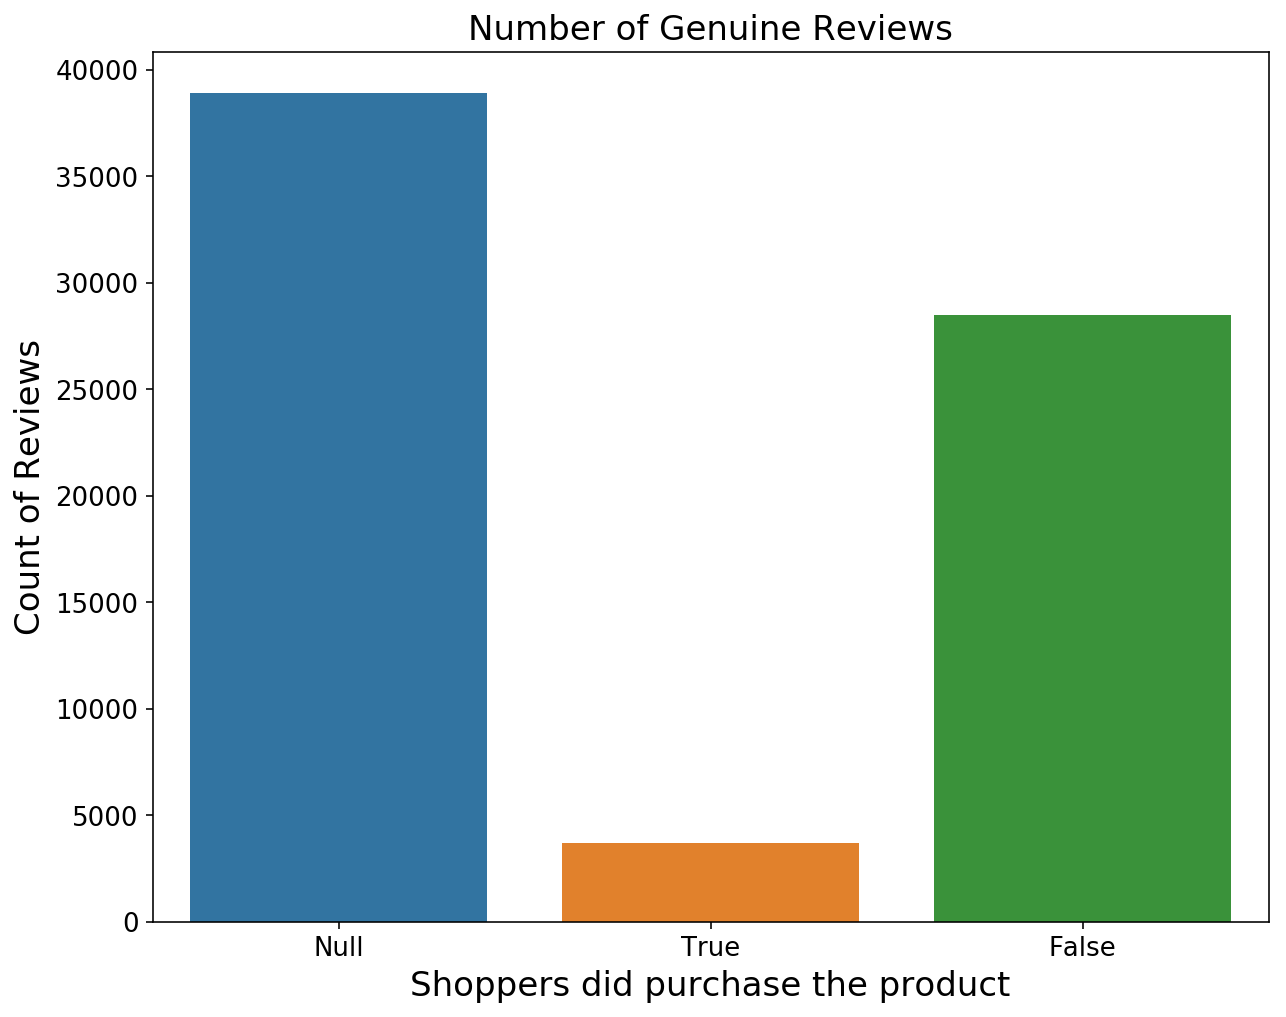

In [47]:
plt.figure(figsize=(10,8))
ax = sns.countplot(df['reviews.didPurchase'])
ax.set_xlabel(xlabel="Shoppers did purchase the product", fontsize=17)
ax.set_ylabel(ylabel='Count of Reviews', fontsize=17)
ax.axes.set_title('Number of Genuine Reviews', fontsize=17)
ax.tick_params(labelsize=13)

In [193]:
df['reviews.didPurchase'].value_counts()

Null     38886
False    28476
True      3682
Name: reviews.didPurchase, dtype: int64

In [194]:
# shoppers who did purchased the product and provided the review = 5%
3681/70008

0.05257970517655125

## Visualise the correlation map

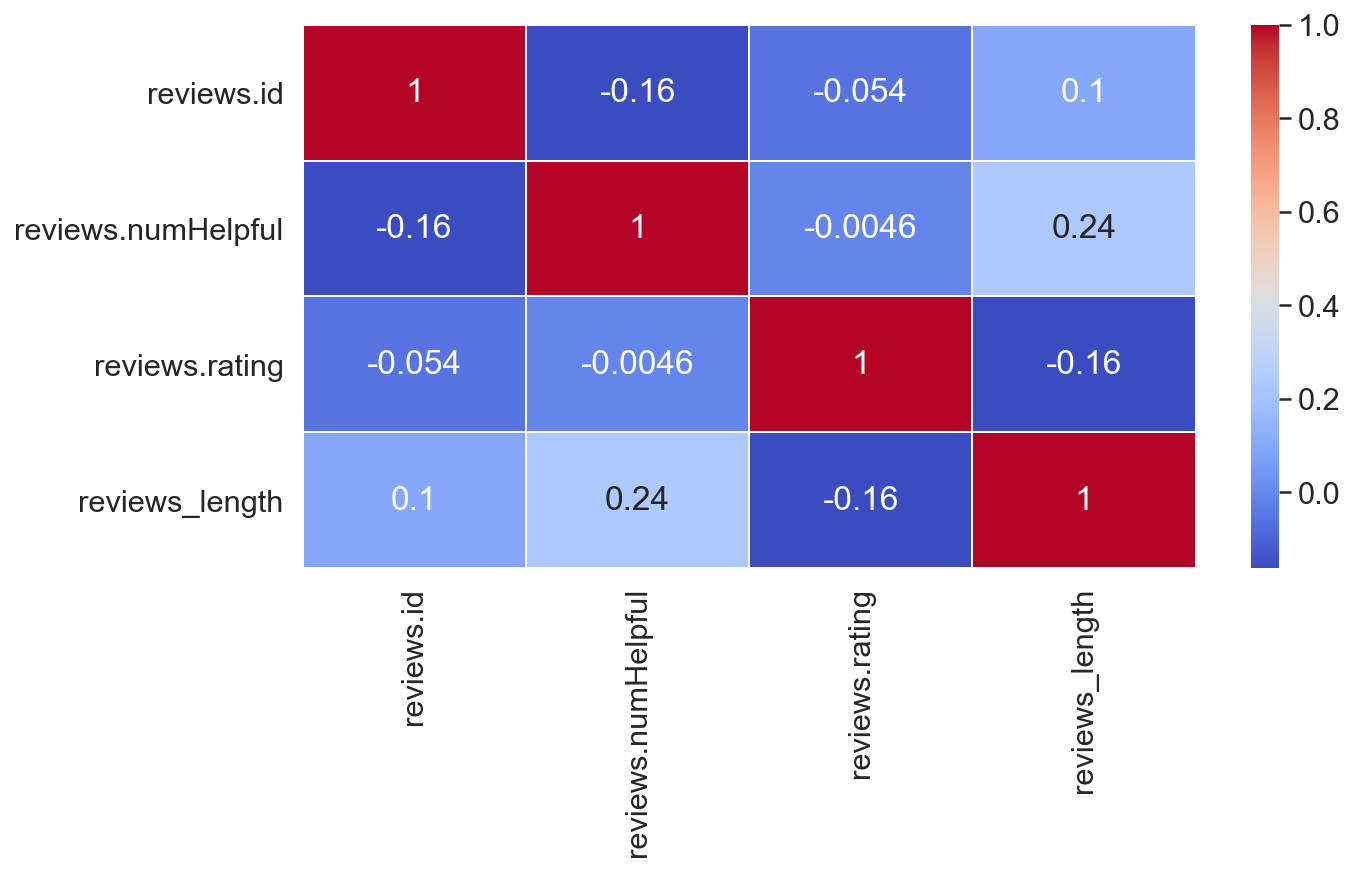

In [22]:
# not much info in the correlation map
sns.set(font_scale=1.4)
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,linewidths=.5)

## Which is the most popular product purchased?

In [198]:
# "The Foodsaver174 10 Cup Fresh Container - Fac10-000" is purchased almost 500 times
df1 = df[df['reviews.didPurchase'] == True]
df1['name'].value_counts()

The Foodsaver174 10 Cup Fresh Container - Fac10-000                               477
Pantene Airspray Hairspray - 7 Oz                                                 443
Hormel Chili, No Beans                                                             91
Coty Airspun Face Powder, Translucent Extra Coverage                               88
Just For Men Brush-In Color Gel For Mustache & Beard, Dark Brown M-45              80
Chester's Cheese Flavored Puffcorn Snacks                                          79
Just For Men Shampoo In Hair Color, Light-Medium Brown 30                          73
Oralbalance Mouth Moisturizing Gel                                                 63
Tostitos Bite Size Tortilla Chips                                                  60
Cinnamon Toast Crunch                                                              59
Lysol Concentrate Deodorizing Cleaner, Original Scent                              56
Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks    

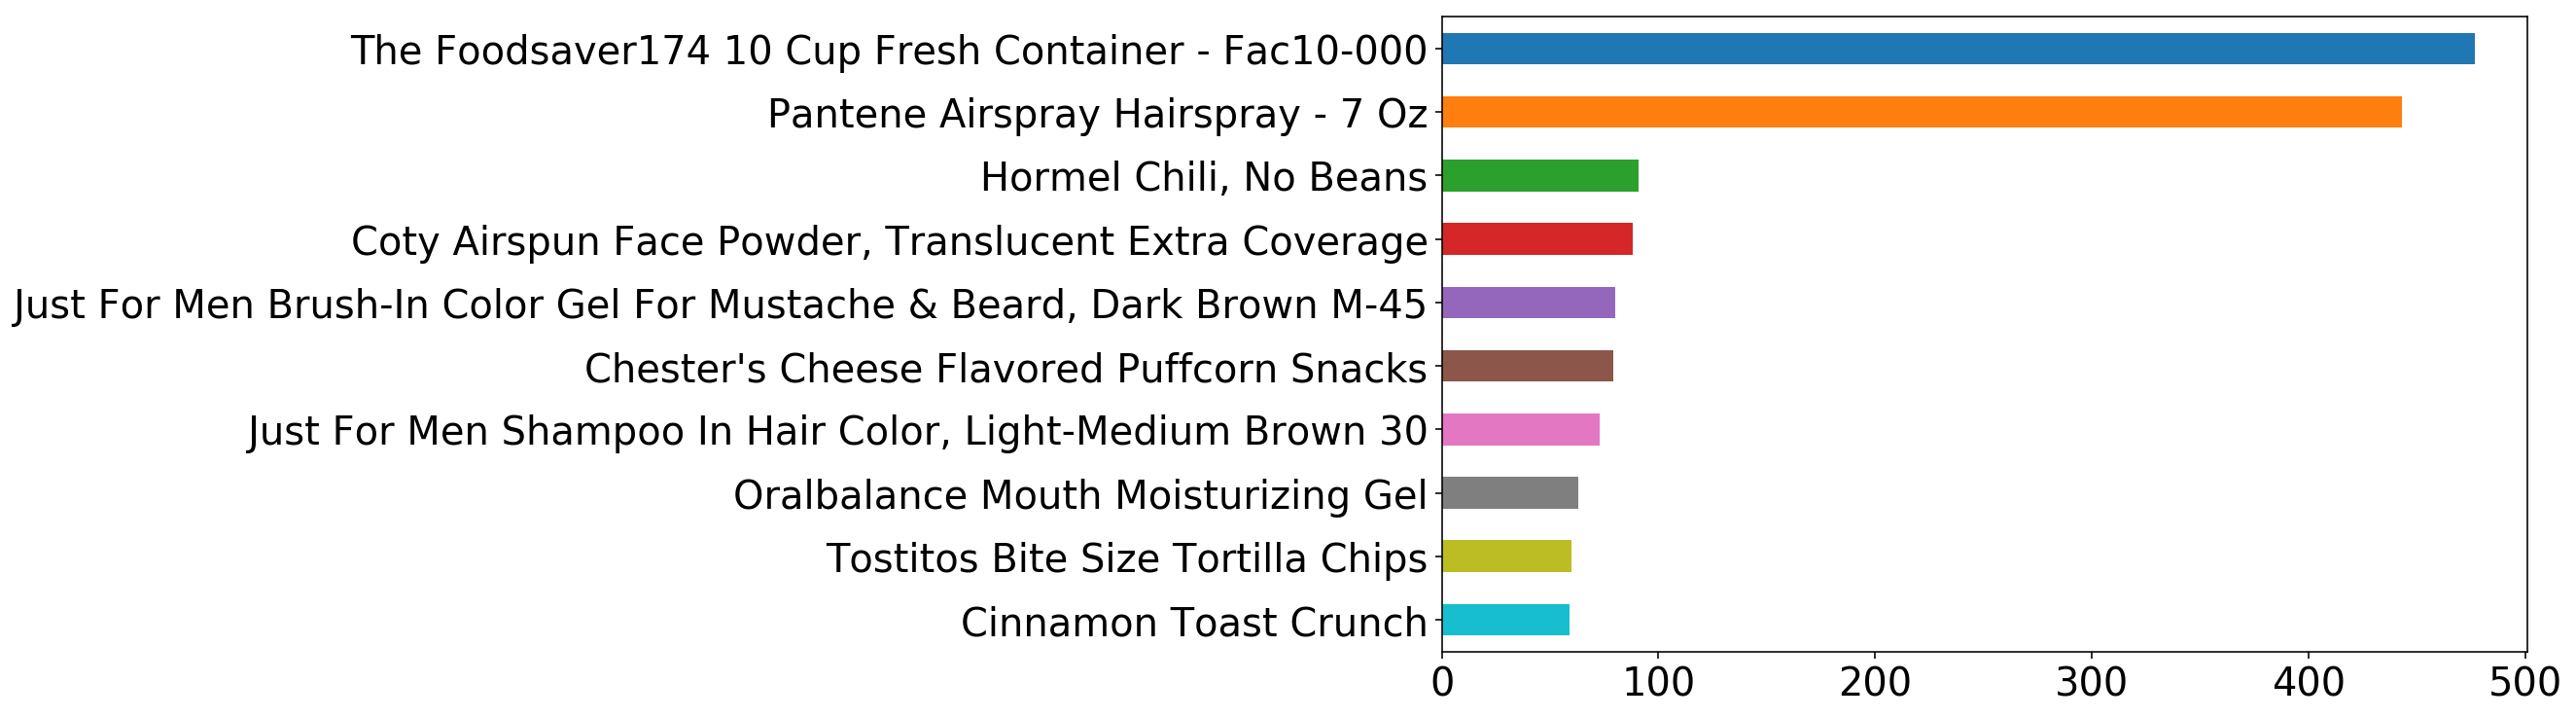

In [200]:
df1['name'].value_counts()[0:10].plot('barh', figsize=[10,6], fontsize=20).invert_yaxis()

In [ ]:
# filter most purchased product with 5 star rating
df1 = df1[df1['name'] == 'The Foodsaver174 10 Cup Fresh Container - Fac10-000']
df1 = df1[df1['reviews.rating']==5]
# keep relevant columns only
df1 = df1[[ 'reviews.rating', 'reviews.text']]
df1

In [ ]:
df1.to_csv('Foodsaver_5.csv', index = False)
# Refer to 
# unsupervised_topic_modeling_product.ipynb

In [ ]:
# filter most purchased product with 1 star rating
df1 = df1[df1['name'] == 'The Foodsaver174 10 Cup Fresh Container - Fac10-000']
df1 = df1[df1['reviews.rating']==1]
# keep relevant columns only
df1 = df1[[ 'reviews.rating', 'reviews.text']]
df1

In [ ]:
df1.to_csv('Foodsaver_1.csv', index = False)
# Refer to 
# unsupervised_topic_modeling_product.ipynb

# Prediction of Ratings

In [23]:
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer

all_text=df['reviews.text']
# train_text=df['reviews.text']
y=df['reviews.rating']

## Using the n-gram tfidf vectorizer

In [238]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 3) )  # try 1,3
#     max_features=10000)
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(all_text)

In [239]:
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=50000)
char_vectorizer.fit(all_text)
train_char_features = char_vectorizer.transform(all_text)

train_features = hstack([train_char_features, train_word_features])

In [240]:
import time   # time1 = time.time(); time2 = time.time(); time_taken = time2 - time1
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
seed = 71

X_train, X_test, y_train, y_test = train_test_split(train_features, y, test_size=0.3, random_state=seed)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

# 49705x60000 , 21303x6000 , 49705 , 21303
# train_features 71008x60000 , len(y) 71008

X_train (49705, 1346053)
y_train (49705,)
X_test (21303, 1346053)
y_test (21303,)


# Model 1: Random Forest Classifier

In [254]:
from sklearn.ensemble import RandomForestClassifier
time1 = time.time()

classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=seed, n_jobs=-1)
# classifier = RandomForestClassifier(random_state=seed, n_jobs=-1)
classifier.fit(X_train,y_train)
preds1 = classifier.predict(X_test)

time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

Time Taken:  955.1175563335419


In [255]:
print("Random Forest Model accuracy", accuracy_score(preds1, y_test))
print(classification_report(preds1, y_test))
print(confusion_matrix(preds1, y_test))

Random Forest Model accuracy 0.7151105478101676
              precision    recall  f1-score   support

           1       0.41      0.90      0.56       510
           2       0.18      1.00      0.31        99
           3       0.11      0.95      0.19       150
           4       0.14      0.74      0.24       826
           5       0.99      0.71      0.83     19718

   micro avg       0.72      0.72      0.72     21303
   macro avg       0.37      0.86      0.42     21303
weighted avg       0.94      0.72      0.79     21303

[[  460    31    12     4     3]
 [    0    99     0     0     0]
 [    1     1   142     5     1]
 [    8    16   122   613    67]
 [  663   403  1037  3695 13920]]


In [ ]:
# n_estimators=None

# Random Forest Model accuracy 0.7014504999295874
#               precision    recall  f1-score   support

#            1       0.52      0.74      0.61       784
#            2       0.16      0.79      0.27       120
#            3       0.16      0.51      0.24       419
#            4       0.25      0.46      0.33      2412
#            5       0.93      0.74      0.82     17568

#    micro avg       0.70      0.70      0.70     21303
#    macro avg       0.41      0.65      0.45     21303
# weighted avg       0.82      0.70      0.74     21303

# [[  578    74    37    40    55]
#  [   14    95     4     1     6]
#  [   23    36   212    94    54]
#  [   73    84   316  1114   825]
#  [  426   288   772  3138 12944]]

In [ ]:
# n_estimators=300 
# Time Taken:  955
# Random Forest Model accuracy 0.7151105478101676
#               precision    recall  f1-score   support

#            1       0.41      0.90      0.56       510
#            2       0.18      1.00      0.31        99
#            3       0.11      0.95      0.19       150
#            4       0.14      0.74      0.24       826
#            5       0.99      0.71      0.83     19718

#    micro avg       0.72      0.72      0.72     21303
#    macro avg       0.37      0.86      0.42     21303
# weighted avg       0.94      0.72      0.79     21303

# [[  460    31    12     4     3]
#  [    0    99     0     0     0]
#  [    1     1   142     5     1]
#  [    8    16   122   613    67]
#  [  663   403  1037  3695 13920]]

# Model 2: XGBoost

In [256]:
import xgboost as xgb
time1 = time.time()

xgb = xgb.XGBClassifier(n_jobs=-1)
xgb.fit(X_train,y_train)
preds2 = xgb.predict(X_test)

time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

Time Taken:  4967.420089483261


In [ ]:
# XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#        colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
#        max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
#        n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
#        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#        silent=True, subsample=1)

# time taken 2410

In [202]:
# manual method to check accuracy, see first 100 predictions, around 70% correct prediction
for i in range(100):
    if preds2[i] == np.array(y_test)[i]:
        print('1', end=', ')   # correct prediction
    else:
        print('0', end=', ')   # wrong prediction

0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 

In [116]:
# manual method to check accuracy, see some prediction of rating
preds2[0:100: 5]

array([5, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5],
      dtype=int64)

In [117]:
# manual method to check accuracy, see correct test label
np.array(y_test)[0:100: 5]

array([4, 2, 5, 5, 5, 4, 5, 5, 5, 4, 5, 5, 2, 5, 4, 5, 4, 4, 5, 5],
      dtype=int64)

In [120]:
# manual method to check accuracy, check on all 21303 test data set
correct = 0
wrong = 0
for i in range(21303):
    if preds2[i] == np.array(y_test)[i]:
        correct += 1
    else:
        wrong += 1
print(correct+wrong)
print(correct/21303)

21303
0.6922029761066516


In [257]:
print("XGBoost Model accuracy", accuracy_score(preds2, np.array(y_test)))

XGBoost Model accuracy 0.7003238980425293


In [258]:
print("XGBoost Model accuracy", accuracy_score(preds2, y_test))
print(classification_report(preds2, y_test))
print(confusion_matrix(preds2, y_test))

XGBoost Model accuracy 0.7003238980425293
              precision    recall  f1-score   support

           1       0.43      0.76      0.55       645
           2       0.02      0.54      0.05        24
           3       0.09      0.54      0.16       220
           4       0.13      0.48      0.21      1175
           5       0.98      0.71      0.83     19239

   micro avg       0.70      0.70      0.70     21303
   macro avg       0.33      0.61      0.36     21303
weighted avg       0.91      0.70      0.78     21303

[[  488    74    41    24    18]
 [    7    13     1     3     0]
 [   12    25   119    50    14]
 [   38    72   273   566   226]
 [  587   366   879  3674 13733]]


In [ ]:
# XGBoost Model accuracy 0.7003238980425293
#               precision    recall  f1-score   support

#            1       0.43      0.76      0.55       645
#            2       0.02      0.54      0.05        24
#            3       0.09      0.54      0.16       220
#            4       0.13      0.48      0.21      1175
#            5       0.98      0.71      0.83     19239

#    micro avg       0.70      0.70      0.70     21303
#    macro avg       0.33      0.61      0.36     21303
# weighted avg       0.91      0.70      0.78     21303

# [[  488    74    41    24    18]
#  [    7    13     1     3     0]
#  [   12    25   119    50    14]
#  [   38    72   273   566   226]
#  [  587   366   879  3674 13733]]

In [ ]:
# can try lightgbm for next model

# Model 3: Logistic Regression

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

In [259]:
time1 = time.time()

logit = LogisticRegression(C=1, multi_class='ovr')
logit.fit(X_train,y_train)
preds3 = logit.predict(X_test)

time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

Time Taken:  56.023197650909424


In [260]:
print("Logistic Regression accuracy", accuracy_score(preds3, y_test))
print(classification_report(preds3, y_test))
print(confusion_matrix(preds3, y_test))

Logistic Regression accuracy 0.7328545275313336
              precision    recall  f1-score   support

           1       0.65      0.75      0.70       973
           2       0.08      0.75      0.14        56
           3       0.18      0.54      0.27       445
           4       0.26      0.51      0.34      2210
           5       0.96      0.76      0.85     17619

   micro avg       0.73      0.73      0.73     21303
   macro avg       0.43      0.66      0.46     21303
weighted avg       0.86      0.73      0.78     21303

[[  734   127    59    30    23]
 [    8    42     4     1     1]
 [   32    62   241    85    25]
 [   46   109   458  1125   472]
 [  312   210   551  3076 13470]]


In [ ]:
# Logistic Regression accuracy 0.7254846735201614
#               precision    recall  f1-score   support

#            1       0.69      0.72      0.71      1069
#            2       0.06      0.58      0.11        62
#            3       0.21      0.47      0.29       590
#            4       0.26      0.49      0.34      2313
#            5       0.95      0.77      0.85     17269

#    micro avg       0.73      0.73      0.73     21303
#    macro avg       0.44      0.61      0.46     21303
# weighted avg       0.84      0.73      0.77     21303

# [[  771   158    75    37    28]
#  [    9    36    12     5     0]
#  [   51    93   280   131    35]
#  [   39   104   441  1138   591]
#  [  244   186   533  3076 13230]]

# So which is better for NLP, Bagging or Boosting?

## Deep Learning 

To classify ratings<4 as sentiment, i.e. replace ratings less than 4 as not happy

label 1= Happy

label 2= Unhappy

In [40]:
df['sentiment'] = df['reviews.rating']<4

In [41]:
from sklearn.model_selection import train_test_split
train_text, test_text, train_y, test_y = train_test_split(df['reviews.text'],df['sentiment'],test_size = 0.2)

In [42]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam

Using TensorFlow backend.


In [43]:
MAX_NB_WORDS = 20000

# get the raw text data
texts_train = train_text.astype(str)
texts_test = test_text.astype(str)

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(texts_train)
sequences = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 26129 unique tokens.


In [44]:
MAX_SEQUENCE_LENGTH = 200
#pad sequences are used to bring all sentences to same size.
# pad sequences with 0s
x_train = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x_train.shape)
print('Shape of data test tensor:', x_test.shape)

Shape of data tensor: (56806, 200)
Shape of data test tensor: (14202, 200)


In [45]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2,input_shape=(1,)))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [46]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [47]:
model.fit(x_train, train_y,
          batch_size=128,
          epochs=10,
          validation_data=(x_test, test_y))

Instructions for updating:
Use tf.cast instead.
Train on 56806 samples, validate on 14202 samples
Epoch 1/10
56806/56806 [==============================] - 492s 9ms/step - loss: 0.2755 - acc: 0.8953 - val_loss: 0.2197 - val_acc: 0.9128
Epoch 2/10
56806/56806 [==============================] - 532s 9ms/step - loss: 0.1961 - acc: 0.9264 - val_loss: 0.2078 - val_acc: 0.9185
Epoch 3/10
56806/56806 [==============================] - 483s 9ms/step - loss: 0.1666 - acc: 0.9388 - val_loss: 0.2080 - val_acc: 0.9213
Epoch 4/10
56806/56806 [==============================] - 564s 10ms/step - loss: 0.1428 - acc: 0.9490 - val_loss: 0.2152 - val_acc: 0.9206
Epoch 5/10
56806/56806 [==============================] - 494s 9ms/step - loss: 0.1241 - acc: 0.9558 - val_loss: 0.2338 - val_acc: 0.9190
Epoch 6/10
56806/56806 [==============================] - 515s 9ms/step - loss: 0.1110 - acc: 0.9616 - val_loss: 0.2384 - val_acc: 0.9189
Epoch 7/10
56806/56806 [==============================] - 561s 10ms/step 